In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
import graphufs
from graphufs.utils import open_zarr
plt.style.use("graphufs.plotstyle")

/contrib2/Tim.Smith/graph-ufs/graphufs/training.py:59: UserWarning: Import failed for either mpi4py or mpi4jax.
  warnings.warn("Import failed for either mpi4py or mpi4jax.")


In [15]:
ds = xr.concat(
    [
        open_zarr(
            f"/testlfs/latent-size-test-{latent_size:03d}/evaluation/validation/graphufs.240h.spectra.zarr",
        ).expand_dims({
            "latent_size": [latent_size],
        })
        for latent_size in [16, 64, 128, 256]
    ],
    dim="latent_size",
)

In [16]:
ds

<xarray.Dataset> Size: 665MB
Dimensions:           (latent_size: 4, fhr: 80, latitude: 192,
                       zonal_wavenumber: 193, level: 6)
Coordinates:
  * latent_size       (latent_size) int64 32B 16 64 128 256
    frequency         (latitude, zonal_wavenumber) float64 296kB 0.0 ... 0.00...
  * latitude          (latitude) float64 2kB 89.82 88.89 87.95 ... -88.18 -89.12
    lead_time         (fhr) timedelta64[ns] 640B 0 days 03:00:00 ... 10 days ...
  * level             (level) float32 24B 998.8 847.8 505.7 231.4 112.3 1.124
    wavelength        (latitude, zonal_wavenumber) float64 296kB inf ... 3.19...
  * zonal_wavenumber  (zonal_wavenumber) int64 2kB 0 1 2 3 4 ... 189 190 191 192
  * fhr               (fhr) int64 640B 3 6 9 12 15 18 ... 228 231 234 237 240
Data variables:
    geopotential      (latent_size, fhr, latitude, zonal_wavenumber, level) float64 569MB dask.array<chunksize=(1, 80, 192, 193, 6), meta=np.ndarray>
    surface_pressure  (latent_size, fhr, latitude, zonal_wavenumber) float64 95MB dask.array<chunksize=(1, 80, 192, 193), meta=np.ndarray>

In [17]:
ds = ds.sortby("latitude")

In [18]:
diff = ds - ds.isel(fhr=0)

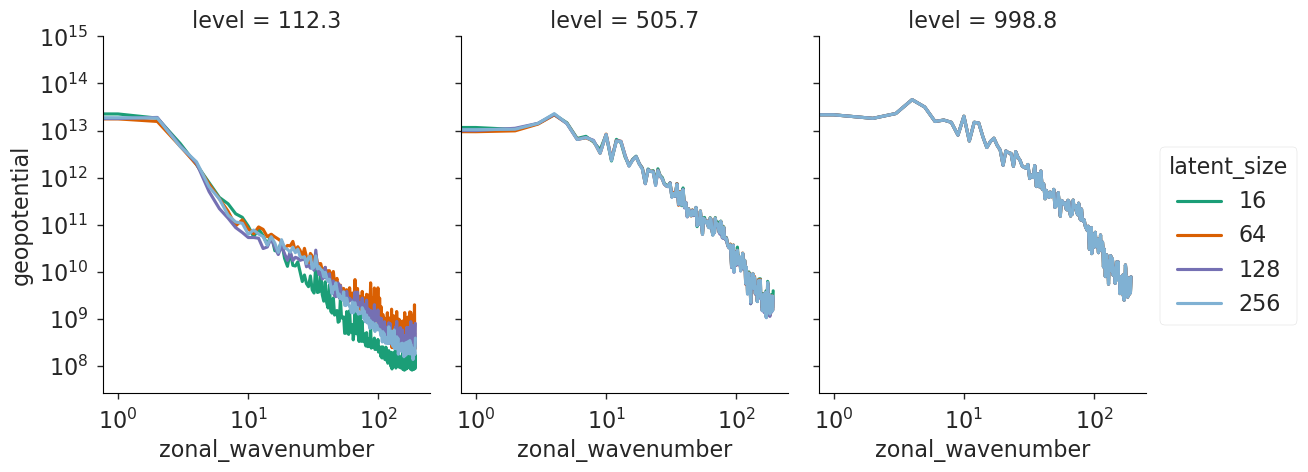

In [21]:
ds.geopotential.sel(
    fhr=24*5,
    level=[100, 500, 1000],
    method="nearest",
).sel(
    latitude=slice(60,70),
).mean("latitude").plot.line(
    x="zonal_wavenumber",
    xscale="log",
    yscale="log",
    ylim=[None, 1e15],
    col="level",
    figsize=(12, 5),
)